## Qué es la regresión logística:

La regresión logística es un modelo de clasificación que se utiliza para predecir la probabilidad de pertenencia de una observación a una de dos clases posibles

A diferencia de la regresión lineal, donde la salida es un valor continuo, en la regresión logística la salida es una probabilidad que luego se convierte en una clase (por ejemplo, 0 o 1).

* Mientras que la regresión lineal predice valores continuos y se basa en la suma de las características ponderadas, la regresión logística predice probabilidades y utiliza la función sigmoide para convertir la salida en un rango entre 0 y 1.

Ejemplos:

* Clasificación de correos electrónicos (spam/no spam).
* Diagnóstico médico (enfermo/no enfermo).
* Detección de fraudes (transacción fraudulenta/no fraudulenta).

## Por qué no usamos el MSE:

El error cuadrático medio (MSE) no es adecuado para la regresión logística porque puede llevar a una función de costo no convexa, lo que dificulta encontrar el mínimo global.

###Función de costo log-loss:

La función log-loss penaliza más las predicciones incorrectas:

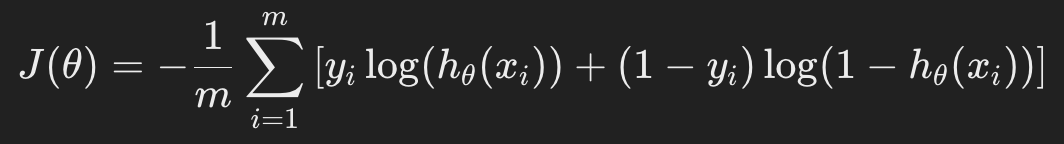





Aquí,
ℎ
𝜃
(
𝑥
𝑖
)
 es la probabilidad predicha por el modelo para la muestra
𝑖.


Log-loss mide la distancia entre la probabilidad predicha y la etiqueta real, con una penalización más alta para errores grandes.

###Entrenamiento del Modelo

Gradiente descendente:

Es un método iterativo para minimizar la función de costo ajustando los parámetros
𝜃.

Calculamos el gradiente de la función de costo y actualizamos
𝜃 en la dirección que disminuye la función de costo:

𝜃
:
=
𝜃
−
𝛼
⋅
∇
𝐽
(
𝜃
)


𝛼 es la tasa de aprendizaje, que controla el tamaño de los pasos de actualización.

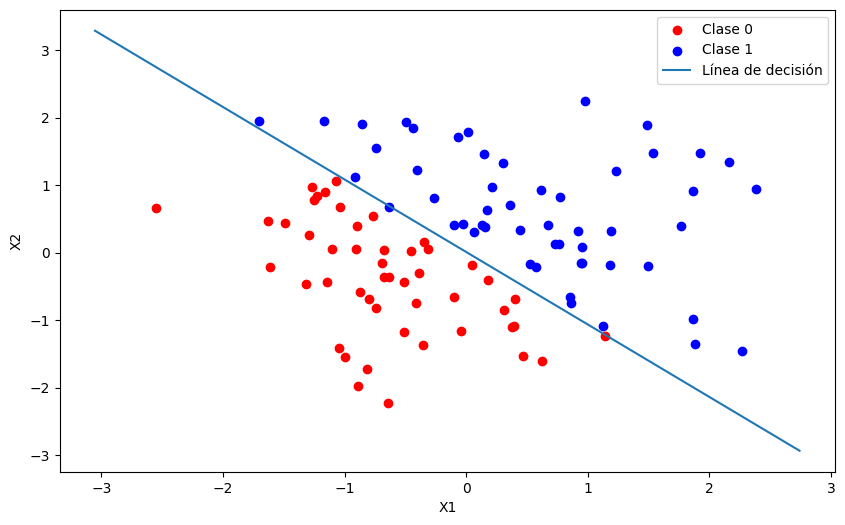

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo (log-loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost

# Gradiente descendente para optimizar los parámetros theta
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = (1/m) * X.T.dot(sigmoid(X.dot(theta)) - y)
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Predicción
def predict(X, theta):
    prob = sigmoid(X.dot(theta))
    return (prob >= 0.5).astype(int)

# Generación de un conjunto de datos sintético
np.random.seed(0)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Agregar una columna de unos para el término de sesgo (intercepto)
X = np.c_[np.ones((X.shape[0], 1)), X]

# Inicialización de los parámetros theta
theta = np.zeros(X.shape[1])

# Parámetros del modelo
learning_rate = 0.1
iterations = 1000

# Entrenar el modelo
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Visualización de los datos y la línea de decisión
plt.figure(figsize=(10, 6))

# Graficar los puntos de datos
plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Clase 0')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Clase 1')

# Graficar la línea de decisión
x_values = [np.min(X[:, 1] - 0.5), np.max(X[:, 2] + 0.5)]
y_values = -(theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.plot(x_values, y_values, label='Línea de decisión')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()



##Descenso por gradiente (Gradient descent)

El método de descenso por gradiente, gradient descent de ahora en adelante, es uno de los algoritmos de optimización más populares en aprendizaje automático, particularmente por su uso extensivo en el campo de las redes neuronales. Gradient descent es un método general de minimización para cualquier función
f
f. A la versión original se le considera lenta pero versátil, sobretodo para casos de que la funciones multi-dimensionales.

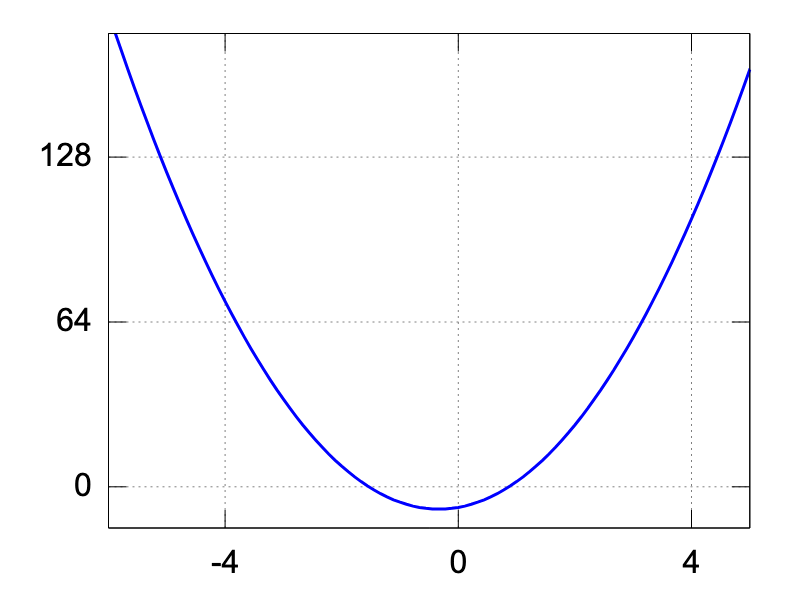

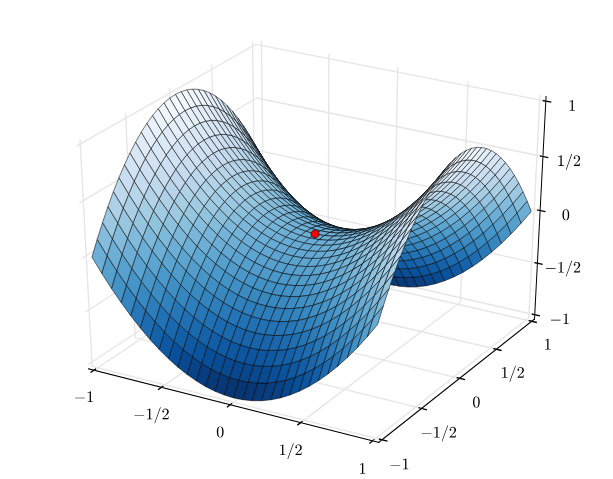

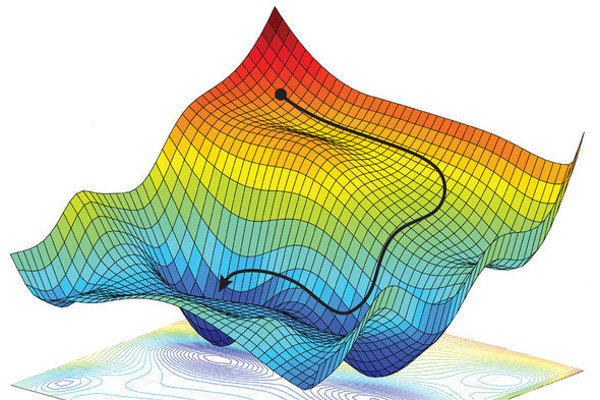

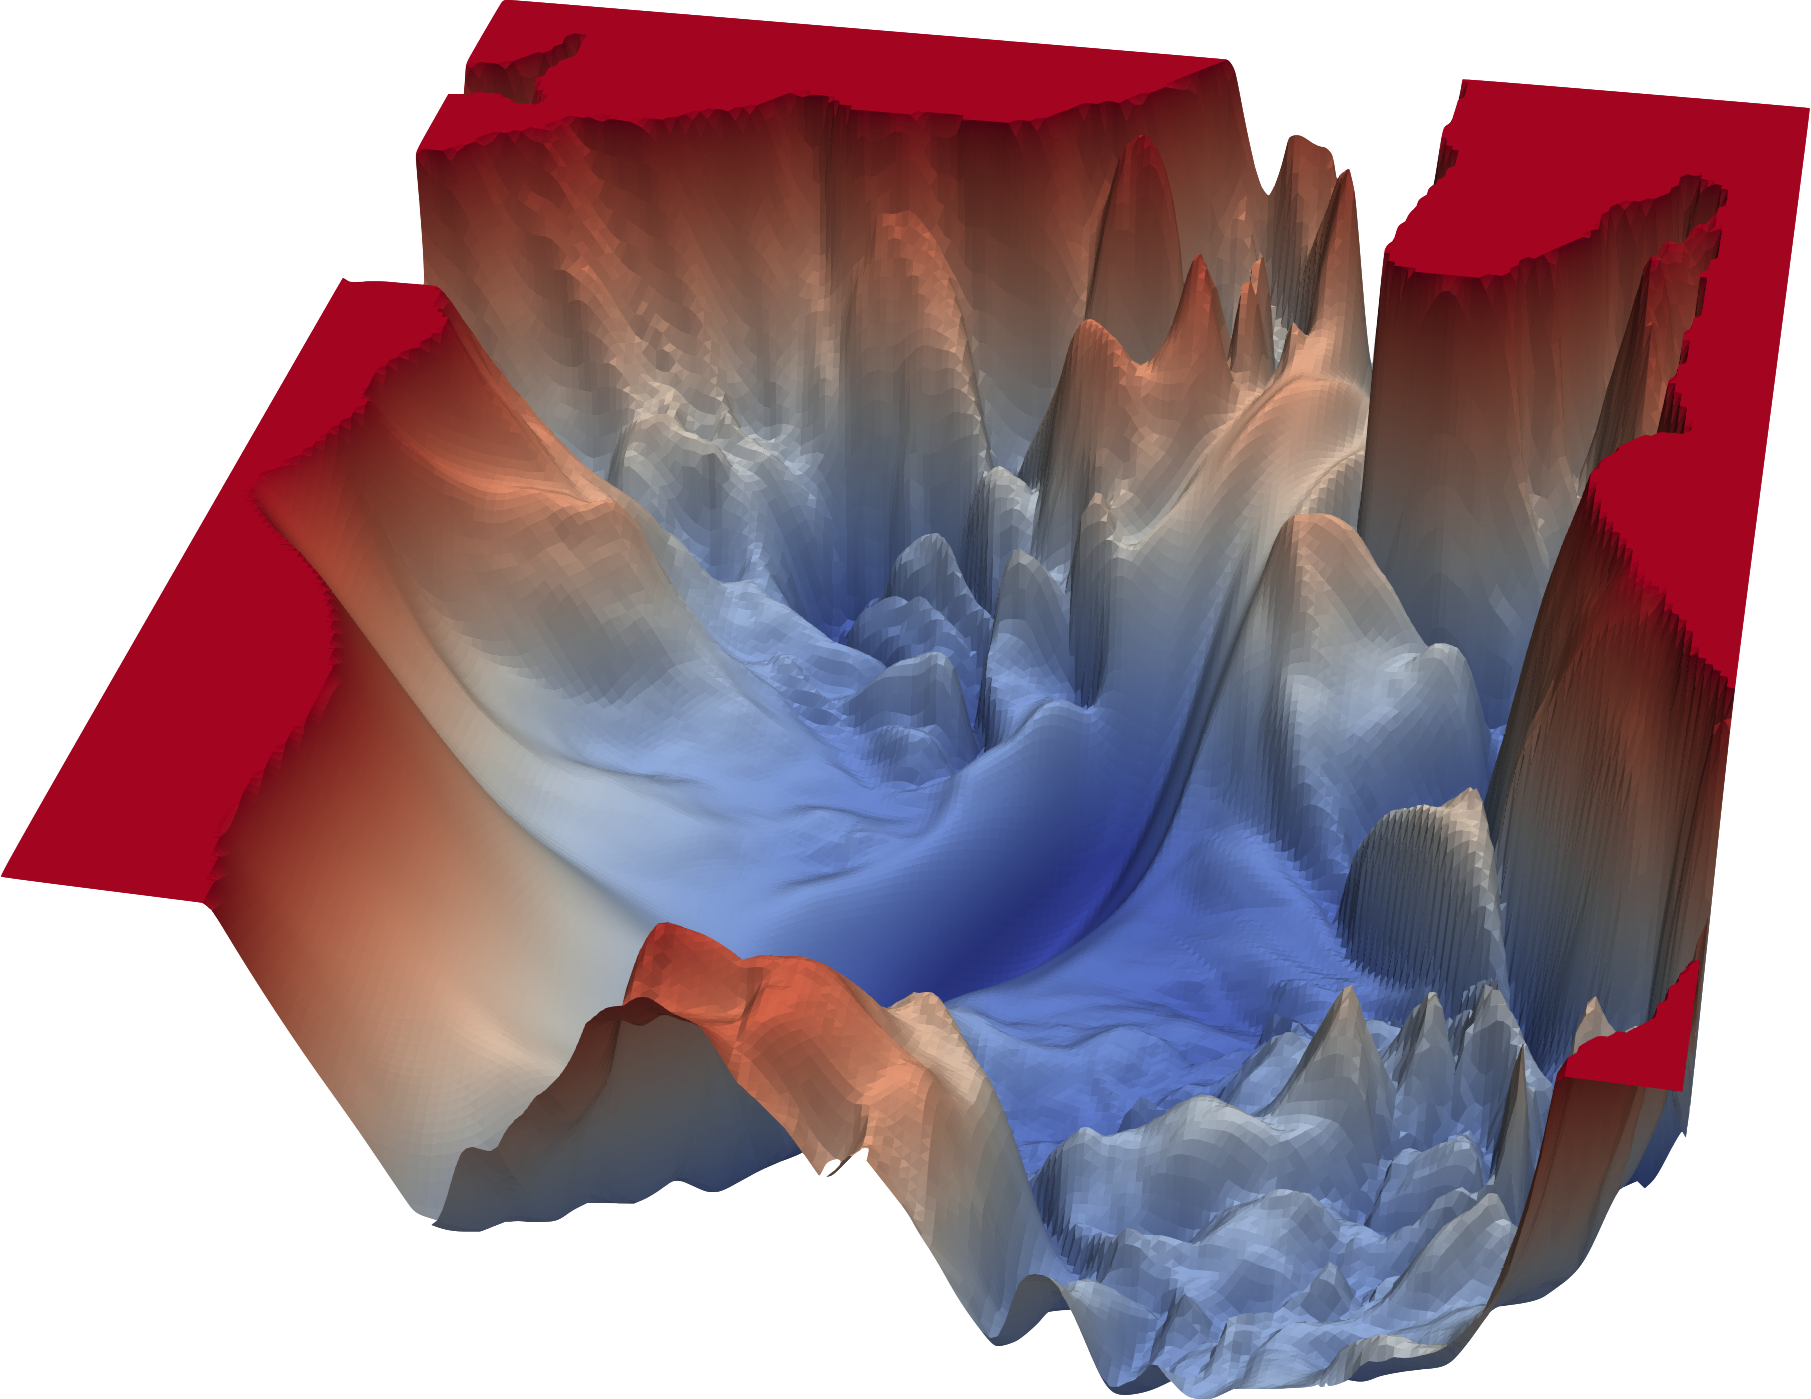

## El método naïve
Imaginemos que nosotros mismos estamos en una montaña y nuestra visibilidad es nula, no podemos ver más allá de un 1cm de distancia, y queremos llegar a un punto seguro localizado en la parte más baja de la montaña. Un forma de lograrlo sería dar un paso en cada una las cuatro orientaciones (este, oeste, norte y sur) y escoger aquella en la que bajemos más para dar un paso en esa dirección

##Gradiente
El gradiente es la generalización vectorial de la derivada, es un vector de tantas dimensiones como la función y cada dimensión contiene la derivada parcial en dicha dimensión:

El gradiente
∇
f
x
​ es el vector que contiene la información de cuanto crece la función en un punto especifico
x por cada dimensión de nuestra furnción de forma independiente.


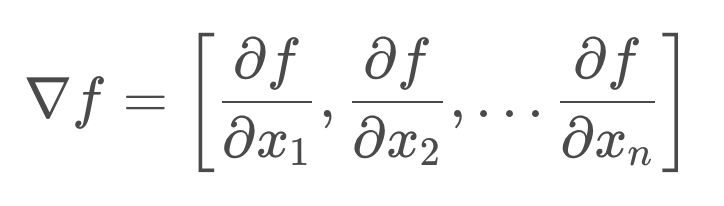



Hasta ahora sabemos en que dirección avanzar para descender, pero no cuánto descender. Una estrategia sería si la función crece “mucho” descender mucho, y si crece “poco” descender poco. Es decir dar el paso en forma proporcional al gradiente. Para poder controlar la proporción del paso utilizaremos un parámetro
k de tal forma que el paso a dar se cuantifica:

−
k
∇


k es un parámetro de tunning del método gradient descent al que llamamos: learning rate

##Ejemplo: regresión lineal para
y
=
m
x
+
b

Regresando al caso que X y Y son uni-dimensional y numéricas, y escogemos un modelo

y
=
m
x
+
b

con parámetros:

θ
=
(
m
,
b
).

Lo que tenemos que hacer es calcular es el gradiente para estos parámetros. Primero escogemos nuestra función de costo, que para el ejemplo será MSE. Esto produce la siguiente expresión:


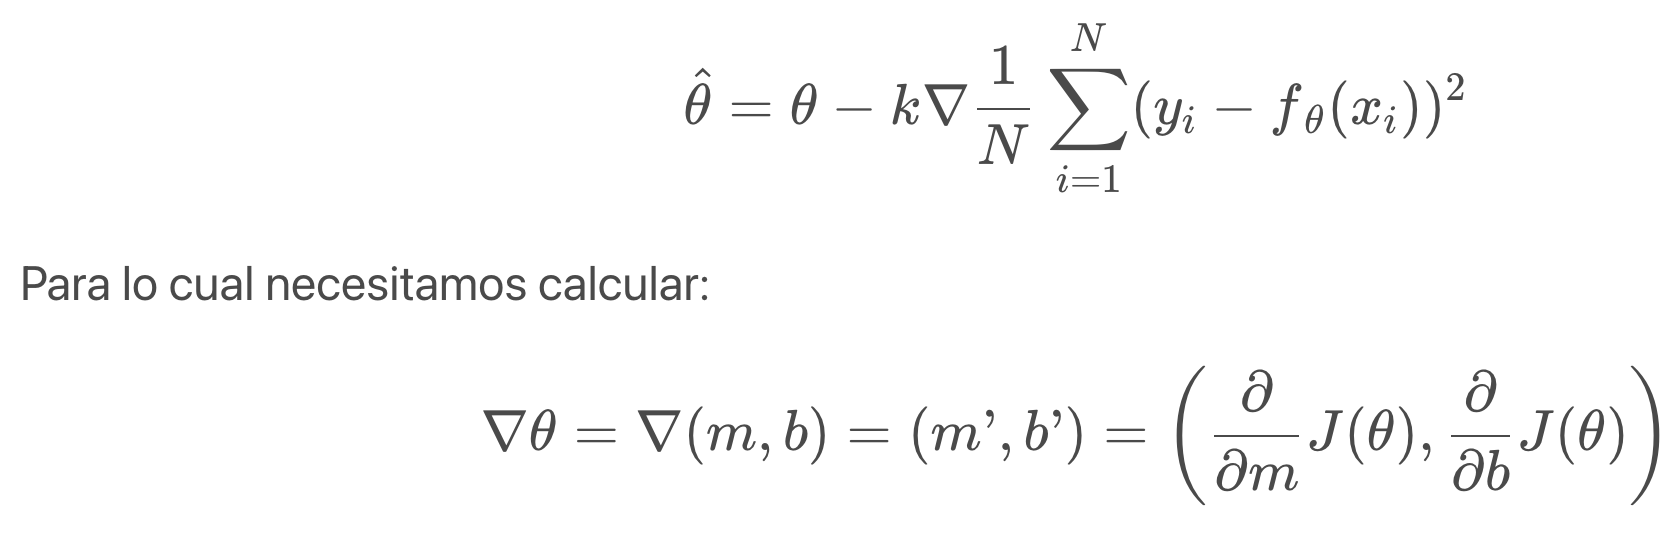

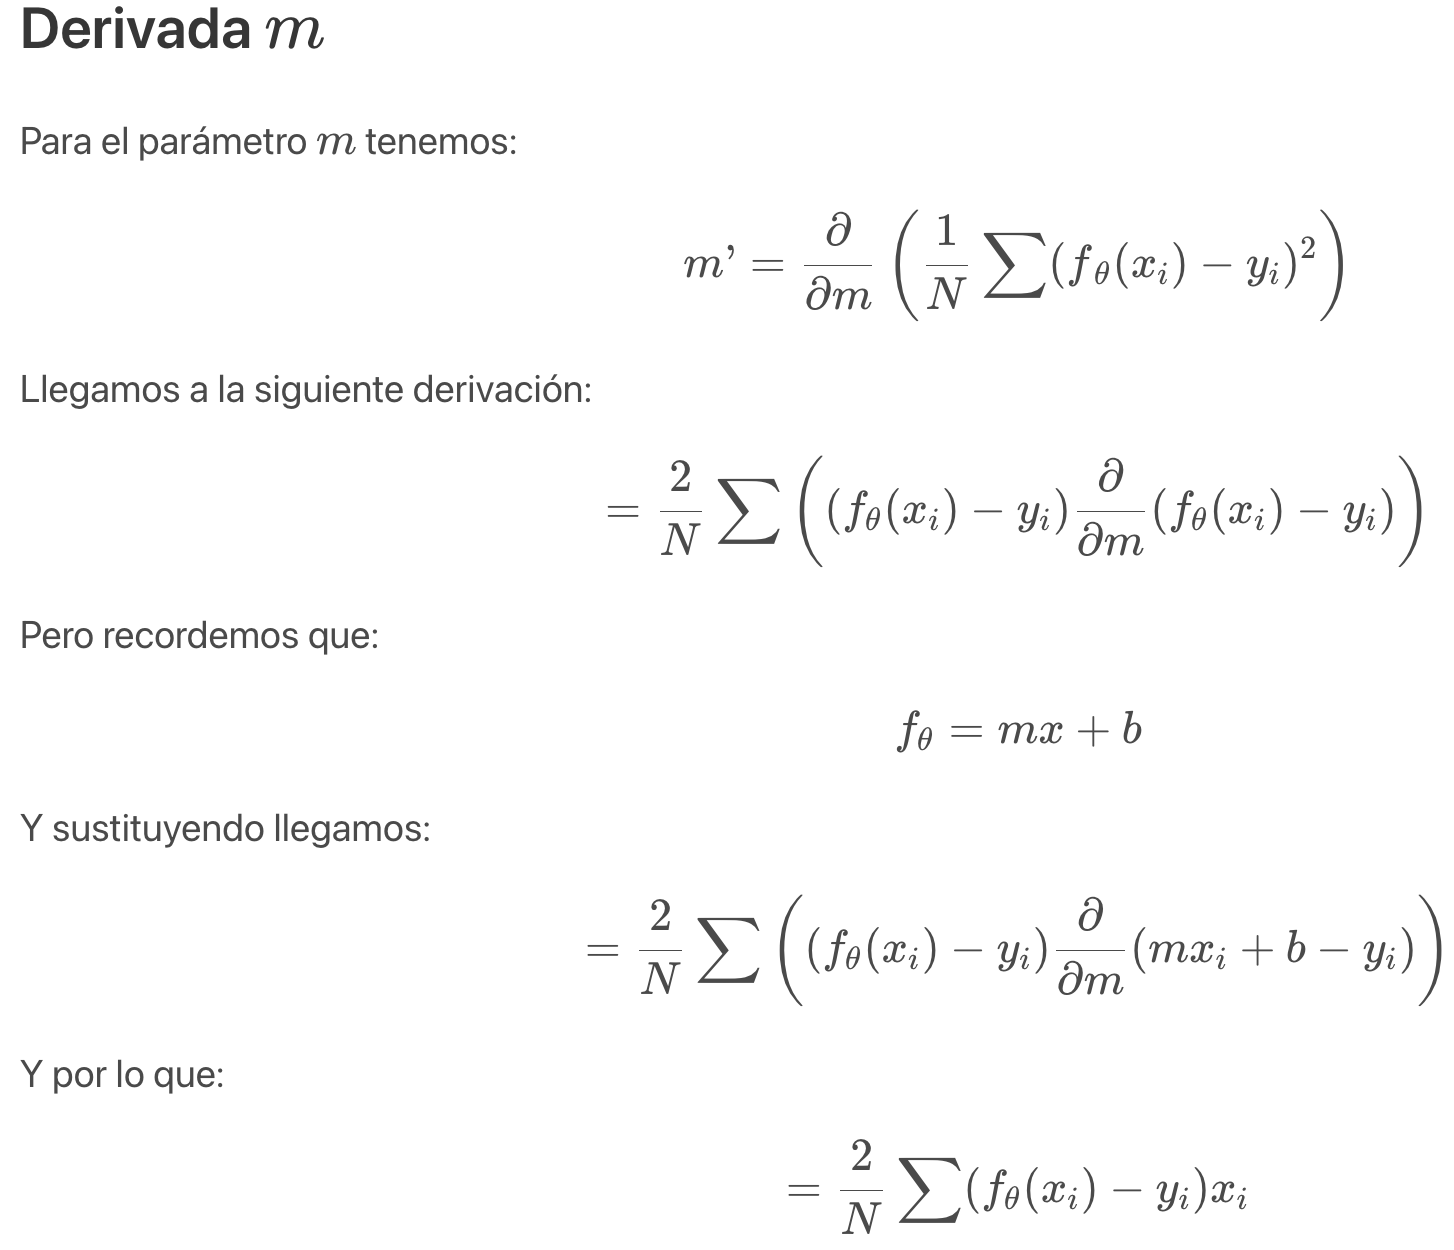


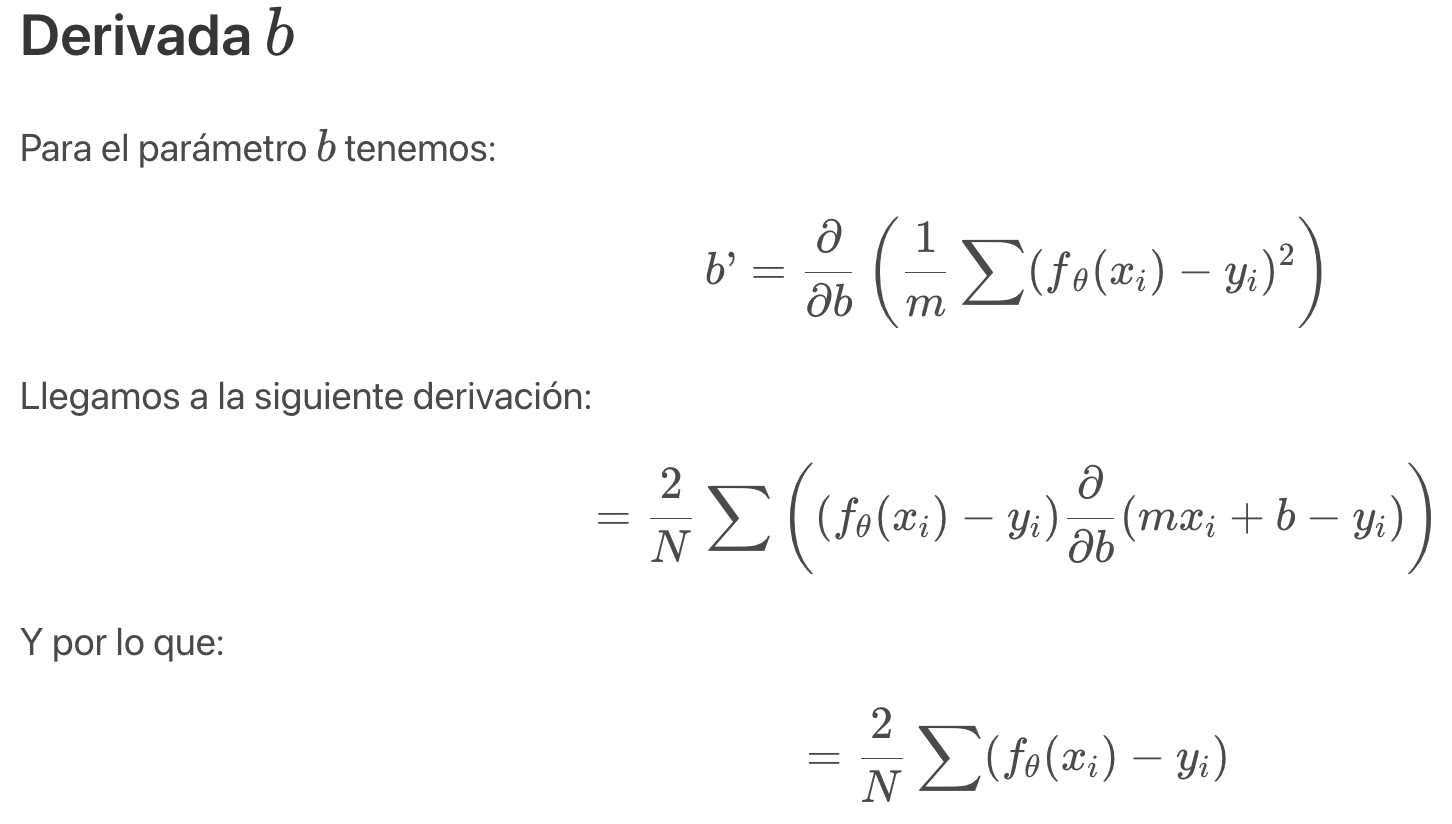

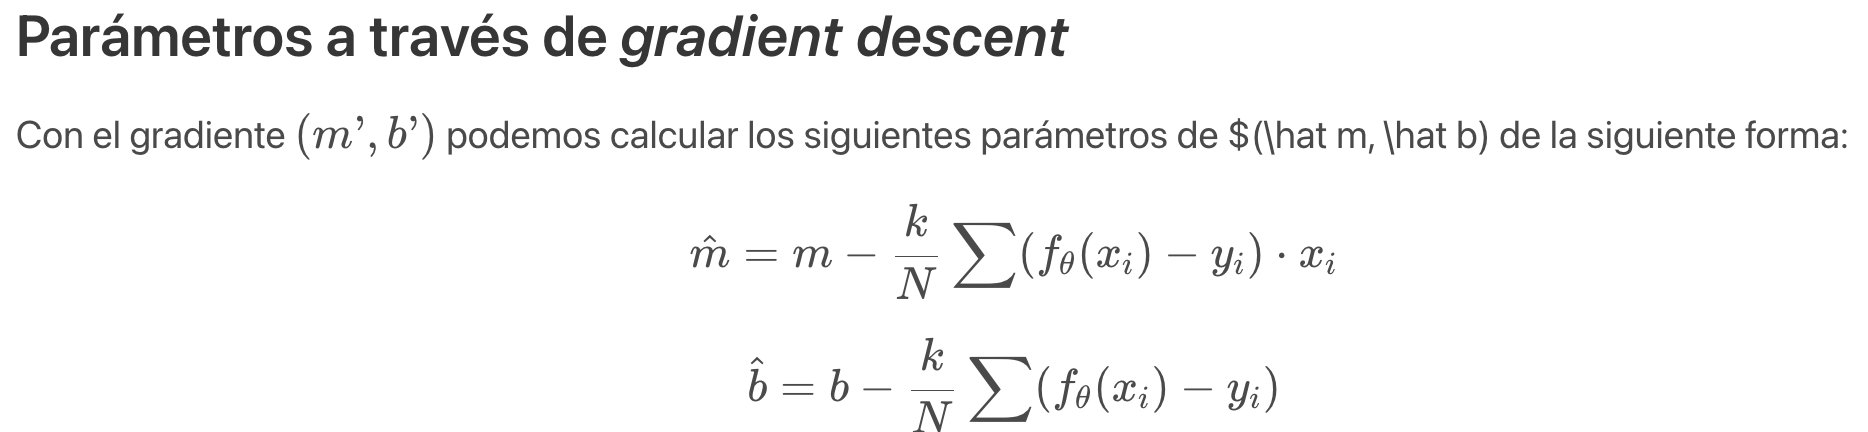